In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib

In [2]:
train_data_frame = pd.read_csv('../Datasets/titanic/train.csv')
test_data_frame = pd.read_csv('../Datasets/titanic/test.csv')

In [3]:
train_data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data_frame = pd.read_csv('../Datasets/titanic/test.csv')

In [6]:
train_data_frame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_data_frame['Survived'] = -888  # adding Survived with default value to test df

In [8]:
#add both train and test data
df = pd.concat((train_data_frame, test_data_frame), axis = 0) #axis is your to concat row wise

C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [10]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [11]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [12]:
df.Fare.plot(kind = 'box');

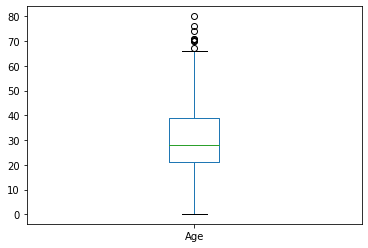

In [13]:
df.Age.plot(kind = 'box')

In [14]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [15]:

df.Sex.value_counts(normalize = True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [16]:
df[df.Survived != -888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

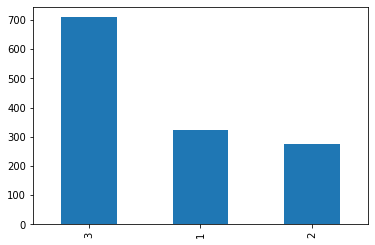

In [17]:
df.Pclass.value_counts().plot(kind = 'bar')

In [18]:
 df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [19]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [20]:
df.Embarked.fillna('S', inplace = True)
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,-888,3701


In [21]:

median_fare = df.loc[(df.Pclass == 3) & (df.Embarked =='S'), 'Fare'].median()

In [22]:
df.Fare.fillna(median_fare, inplace = True)

In [23]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [24]:
df[df.Age.isnull()]


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877
17,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1,244373
19,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1,2649
26,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0,2631
28,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1,330959
...,...,...,...,...,...,...,...,...,...,...,...,...
408,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,1300,3,female,0,-888,334915
410,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,1302,3,female,0,-888,365237
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,-888,A.5. 3236
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,-888,359309


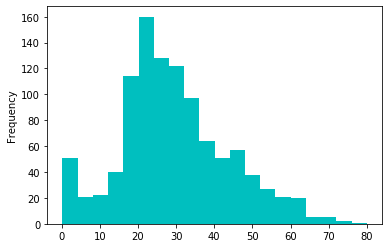

In [25]:

df.Age.plot(kind = 'hist', bins = 20, color = 'c');

In [26]:
df.Age.mean()

29.881137667304014

In [27]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

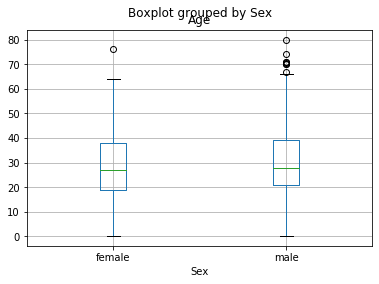

In [28]:
df[df.Age.notnull()].boxplot('Age','Sex')

In [29]:
pclass_age_median = df.groupby('Pclass').Age.transform('median')
df.Age.fillna(pclass_age_median, inplace = True)

In [30]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [31]:
df.loc[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1,PC 17755
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1,PC 17755
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1,PC 17755
343,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,-888,PC 17755


In [32]:
LogFare = np.log(df.Fare + 1.0)

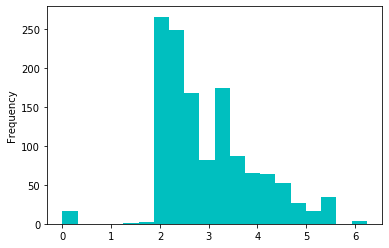

In [33]:
LogFare.plot(kind = 'hist', color = 'c', bins = 20);

In [34]:

pd.qcut(df.Fare, 2)

0       (-0.001, 14.454]
1      (14.454, 512.329]
2       (-0.001, 14.454]
3      (14.454, 512.329]
4       (-0.001, 14.454]
             ...        
413     (-0.001, 14.454]
414    (14.454, 512.329]
415     (-0.001, 14.454]
416     (-0.001, 14.454]
417    (14.454, 512.329]
Name: Fare, Length: 1309, dtype: category
Categories (2, interval[float64]): [(-0.001, 14.454] < (14.454, 512.329]]

In [35]:
pd.qcut(df.Fare, 2, labels = ['low', 'high'])

0       low
1      high
2       low
3      high
4       low
       ... 
413     low
414    high
415     low
416     low
417    high
Name: Fare, Length: 1309, dtype: category
Categories (2, object): [low < high]

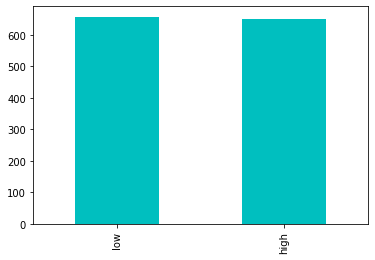

In [36]:

pd.qcut(df.Fare, 2, labels = ['low', 'high']).value_counts().plot(kind = 'bar', color = 'c')

In [37]:
df["AgeState"] = np.where(df['Age'] >= 18, 'Adult', 'Child')

In [38]:
df["AgeState"].value_counts()

Adult    1155
Child     154
Name: AgeState, dtype: int64

In [39]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,497,52
1,281,61


In [40]:
df["FamilySize"] = df.Parch + df.SibSp +1

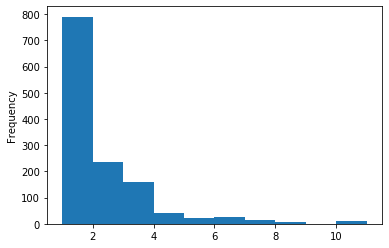

In [41]:

df["FamilySize"].plot(kind = "hist")

In [42]:

df.loc[df.FamilySize == df.FamilySize.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeState,FamilySize
159,24.0,NaN,S,69.55,"Sage, Master. Thomas Henry",2,160,3,male,8,0,CA. 2343,Adult,11
180,24.0,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,181,3,female,8,0,CA. 2343,Adult,11
201,24.0,NaN,S,69.55,"Sage, Mr. Frederick",2,202,3,male,8,0,CA. 2343,Adult,11
324,24.0,NaN,S,69.55,"Sage, Mr. George John Jr",2,325,3,male,8,0,CA. 2343,Adult,11
792,24.0,NaN,S,69.55,"Sage, Miss. Stella Anna",2,793,3,female,8,0,CA. 2343,Adult,11
846,24.0,NaN,S,69.55,"Sage, Mr. Douglas Bullen",2,847,3,male,8,0,CA. 2343,Adult,11
863,24.0,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,864,3,female,8,0,CA. 2343,Adult,11
188,24.0,NaN,S,69.55,"Sage, Miss. Ada",2,1080,3,female,8,-888,CA. 2343,Adult,11
342,24.0,NaN,S,69.55,"Sage, Mr. John George",9,1234,3,male,1,-888,CA. 2343,Adult,11
360,14.5,NaN,S,69.55,"Sage, Master. William Henry",2,1252,3,male,8,-888,CA. 2343,Child,11


In [43]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [44]:
df["IsMother"] = np.where(((df.Sex == 'female') & (df.Parch>0) & (df.Age>20)), 1,0)

In [45]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother )

IsMother,0,1
Survived,,
0,524,25
1,292,50


In [46]:

df.Cabin


0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 1309, dtype: object

In [47]:

df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [48]:

df.loc[df.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeState,FamilySize,IsMother
339,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,340,1,male,0,0,113784,Adult,1,0


In [49]:
df.loc[df.Cabin == "T", "Cabin"] = np.NaN

In [50]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [51]:

def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),"Z")
df["Deck"] = df["Cabin"].map(lambda x: get_deck(x))

In [52]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [53]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
Age            1309 non-null float64
Cabin          294 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
AgeState       1309 non-null object
FamilySize     1309 non-null int64
IsMother       1309 non-null int32
Deck           1309 non-null object
dtypes: float64(2), int32(1), int64(6), object(7)
memory usage: 168.7+ KB


In [55]:
df = pd.get_dummies(df, columns=["Deck", "Pclass", "Embarked", "AgeState"])

In [56]:

df.drop(["Cabin", "Name", "Ticket", "Parch","SibSp", "Sex"], axis = 1, inplace = True)

In [57]:

df.head()

,Age,Fare,PassengerId,Survived,FamilySize,IsMother,Deck_A,Deck_B,Deck_C,Deck_D,...,Deck_G,Deck_Z,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
0,22.0,7.2500,1,0,2,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
1,38.0,71.2833,2,1,2,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,26.0,7.9250,3,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
3,35.0,53.1000,4,1,2,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
4,35.0,8.0500,5,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0


In [58]:
columns = [column for column in df.columns if column != "Survived"]

In [59]:
columns = ["Survived"] + columns
df =df[columns]

In [60]:
df.head()

,Survived,Age,Fare,PassengerId,FamilySize,IsMother,Deck_A,Deck_B,Deck_C,Deck_D,...,Deck_G,Deck_Z,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
0,0,22.0,7.2500,1,2,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,2,2,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,1,26.0,7.9250,3,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
3,1,35.0,53.1000,4,2,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
4,0,35.0,8.0500,5,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0


In [61]:

import matplotlib.pyplot as plt

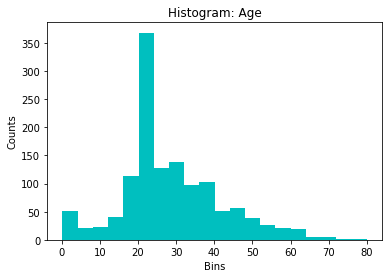

In [62]:

plt.hist(df.Age, bins = 20, color ="c");
plt.title("Histogram: Age")
plt.xlabel("Bins")
plt.ylabel("Counts")
plt.show()

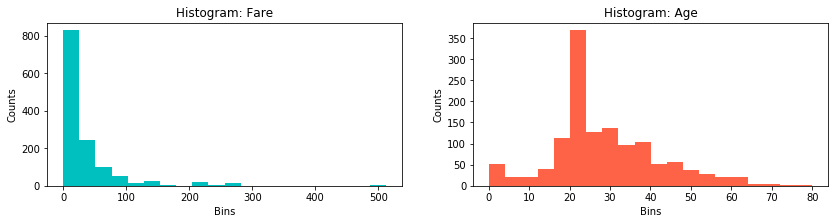

In [63]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(14,3))
ax1.hist(df.Fare, bins = 20, color = "c")
ax1.set_title("Histogram: Fare")
ax1.set_xlabel("Bins")
ax1.set_ylabel("Counts")

ax2.hist(df.Age, bins = 20, color = "tomato")
ax2.set_title("Histogram: Age")
ax2.set_xlabel("Bins")
ax2.set_ylabel("Counts")
plt.show()

In [64]:
#Base line model 

In [65]:
#base classfier
from sklearn.dummy import DummyClassifier

In [66]:
test_data = df[df.Survived == -888]

In [67]:
train_data = df[df.Survived!= -888]

In [68]:
Features = train_data.loc[:,"Age":].as_matrix().astype('float')

C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [69]:
labels = train_data["Survived"].ravel()

In [70]:
print(Features.shape, labels.shape)

(891, 21) (891,)


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(Features, labels, test_size=0.25, random_state=42)

In [73]:
print(X_train.shape, y_train.shape)

(668, 21) (668,)


In [74]:
print(X_test.shape, y_test.shape)

(223, 21) (223,)


In [75]:
print("mean servival in train {0:2f}" .format(np.mean(y_train)))
print("mean servival in test {0:2f}" .format(np.mean(y_test)))

mean servival in train 0.378743
mean servival in test 0.399103


In [76]:
#dummy model


dummy_model = DummyClassifier(strategy="most_frequent")

In [77]:
dummy_model.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [78]:
dummy_model.score(X_test, y_test)

0.600896860986547

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [80]:
predictions = dummy_model.predict(X_test)


In [81]:
accuracy_score(y_test, predictions)

0.600896860986547

In [82]:
confusion_matrix(y_test, predictions)

array([[134,   0],
       [ 89,   0]], dtype=int64)

In [83]:
precision_score(y_test, predictions)

C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [84]:
recall_score(y_test, predictions)

0.0

In [85]:
from sklearn import metrics

In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3991031390134529
MSE: 0.3991031390134529
RMSE: 0.6317461032831567


In [87]:
#Using Logistic regression



In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
regressor = LogisticRegression()

In [90]:
regressor.fit(X_train, y_train)

C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
regressor.score(X_test,y_test)

0.7488789237668162

In [92]:
#compatively with base mode the score is increased

In [93]:
predictions = regressor.predict(X_test)

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 0.25112107623318386
MSE: 0.25112107623318386
RMSE: 0.501119822231354


In [95]:
print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print("Confusion Matrix: ", metrics.confusion_matrix(y_test, predictions))
print("precision score: ", metrics.precision_score(y_test, predictions))
print("Recall Score :", metrics.recall_score(y_test, predictions))

Accuracy:  0.7488789237668162
Confusion Matrix:  [[118  16]
 [ 40  49]]
precision score:  0.7538461538461538
Recall Score : 0.550561797752809


In [96]:
regressor.coef_

array([[-2.49090939e-02,  8.60387676e-03, -2.03350344e-04,
        -2.83416319e-01,  1.99347999e+00, -2.35561027e-01,
         6.03207888e-01, -1.68445121e-01,  7.71226609e-01,
         9.71344575e-01,  2.29828623e-02, -5.37647334e-01,
        -6.44487460e-01,  3.44806731e-01,  8.06481173e-01,
        -3.68666913e-01,  3.93519127e-01,  5.62085837e-01,
        -1.72983973e-01, -1.71834817e-01,  9.54455808e-01]])

In [97]:
predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
#RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,n_jobs=-1,max_features=None,random_state=42)

In [100]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [101]:
predictions = clf.predict(X_test)

In [102]:
predictions

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [103]:
print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print("Confusion Matrix: ", metrics.confusion_matrix(y_test, predictions))
print("precision score: ", metrics.precision_score(y_test, predictions))
print("Recall Score :", metrics.recall_score(y_test, predictions))

Accuracy:  0.7354260089686099
Confusion Matrix:  [[108  26]
 [ 33  56]]
precision score:  0.6829268292682927
Recall Score : 0.6292134831460674


In [104]:
from sklearn.metrics import classification_report
classification_report(y_true=y_test, y_pred=predictions,output_dict=True)

{'0': {'precision': 0.7659574468085106,
  'recall': 0.8059701492537313,
  'f1-score': 0.7854545454545455,
  'support': 134},
 '1': {'precision': 0.6829268292682927,
  'recall': 0.6292134831460674,
  'f1-score': 0.6549707602339182,
  'support': 89},
 'accuracy': 0.7354260089686099,
 'macro avg': {'precision': 0.7244421380384016,
  'recall': 0.7175918161998993,
  'f1-score': 0.7202126528442319,
  'support': 223},
 'weighted avg': {'precision': 0.7328196667139842,
  'recall': 0.7354260089686099,
  'f1-score': 0.7333780571826359,
  'support': 223}}

In [105]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


75.45

In [106]:
Test_ = test_data.iloc[:,1:]

In [107]:
# train all the following one by one
# machine learning
#LogisticRegression is done
#RandomForestClassifier is done
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [108]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


75.45

In [109]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


97.31

In [110]:
Y_sub_svc = svc.predict(Test_)

In [111]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [112]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

80.69

In [113]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

73.2

In [114]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

58.38

In [115]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


62.28

In [116]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

66.32

In [117]:
# decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [119]:
Y_sub_DT = decision_tree.predict(Test_)

In [120]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [121]:
Y_sub_RF = random_forest.predict(Test_)

In [126]:
Y_sub_RF

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [127]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
0,Support Vector Machines,97.31
1,KNN,80.69
2,Logistic Regression,75.45
4,Naive Bayes,73.20
6,Stochastic Gradient Decent,66.32
7,Linear SVC,62.28
5,Perceptron,58.38


In [128]:
submission = pd.DataFrame({
        "PassengerId": Test_["PassengerId"],
        "Survived": Y_sub_RF
    })


In [129]:
Y_sub_RF

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [130]:
submission.to_csv('DTsubmission.csv', index=False)